In [4]:
import pandas as pd
import numpy as np
import os
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

In [5]:
df = wrangle.wrangle_zillow()

In [6]:
df

,bathrooms,bedrooms,sqft,fips,lot_size,city,county,zipcode,year,tax_value,transactiondate,logerror
18,1.0,3,1244.0,6037,6021.0,13716,3101,96201.0,1950,169471.0,2017-01-03,0.042412
19,2.0,3,1300.0,6037,4917.0,53636,3101,96193.0,1950,233266.0,2017-01-03,-0.000908
20,2.0,3,1222.0,6037,5500.0,53636,3101,96193.0,1951,290492.0,2017-01-03,-0.316484
23,2.5,3,1821.0,6059,2442.0,24812,1286,97040.0,2013,537949.0,2017-01-03,0.344151
35,2.5,4,2522.0,6059,4904.0,52650,1286,96951.0,2012,587490.0,2017-01-03,0.070535
...,...,...,...,...,...,...,...,...,...,...,...,...
56075,2.0,3,1600.0,6037,6709.0,40227,3101,97330.0,1992,180715.0,2017-09-20,-0.002245
56076,3.0,4,1921.0,6037,6763.0,40227,3101,97330.0,1990,162019.0,2017-09-20,0.020615
56077,3.0,4,1780.0,6037,6822.0,40227,3101,97330.0,1989,125923.0,2017-09-21,0.013209
56078,2.0,3,1549.0,6037,6987.0,40227,3101,97330.0,1990,198988.0,2017-09-21,0.037129


In [7]:
df.describe()

,bathrooms,bedrooms,sqft,fips,lot_size,city,county,zipcode,year,tax_value,logerror
count,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000,26421.000000
mean,2.041425,3.184739,1595.048219,6049.169108,6410.879755,34772.775217,2543.334507,96552.199614,1960.230574,317961.017524,0.016877
std,0.586109,0.639990,419.633379,21.417387,1592.682114,52092.958679,793.837430,406.945011,19.570855,128534.037700,0.173258
min,1.000000,1.000000,1001.000000,6037.000000,1010.000000,3491.000000,1286.000000,95982.000000,1900.000000,100002.000000,-4.655420
25%,2.000000,3.000000,1266.000000,6037.000000,5505.000000,12447.000000,1286.000000,96206.000000,1950.000000,215173.000000,-0.024399
50%,2.000000,3.000000,1512.000000,6037.000000,6420.000000,24812.000000,3101.000000,96414.000000,1958.000000,303972.000000,0.006746
75%,2.000000,4.000000,1836.000000,6059.000000,7465.000000,42967.000000,3101.000000,96996.000000,1973.000000,415605.000000,0.039471
max,3.500000,4.000000,2999.000000,6111.000000,9999.000000,396556.000000,3101.000000,97330.000000,2015.000000,599833.000000,3.394544


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26421 entries, 18 to 56079
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        26421 non-null  float64
 1   bedrooms         26421 non-null  int64  
 2   sqft             26421 non-null  float64
 3   fips             26421 non-null  int64  
 4   lot_size         26421 non-null  float64
 5   city             26421 non-null  int64  
 6   county           26421 non-null  int64  
 7   zipcode          26421 non-null  float64
 8   year             26421 non-null  int64  
 9   tax_value        26421 non-null  float64
 10  transactiondate  26421 non-null  object 
 11  logerror         26421 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 2.6+ MB


In [9]:
def plot_variable_hist(df):
    '''This function takes in a dataframe and returns a histogram for each variable.'''
    plt.figure(figsize=(24, 20))

    # List of columns
    cols = ['bedrooms', 'bathrooms', 'sqft', 'tax_value', 'lot_size', 'year', 'fips', 'county']
    for i, col in enumerate(cols):
        # i starts at 0, but plot nos should start at 1
        subplot_num = i+1
        # Create subplot.
        plt.subplot(5,2,subplot_num)
        # Title with column name.
        plt.title(col)
        # Display histogram for column.
        df[col].hist()
        # Hide gridlines.
        plt.grid(False)

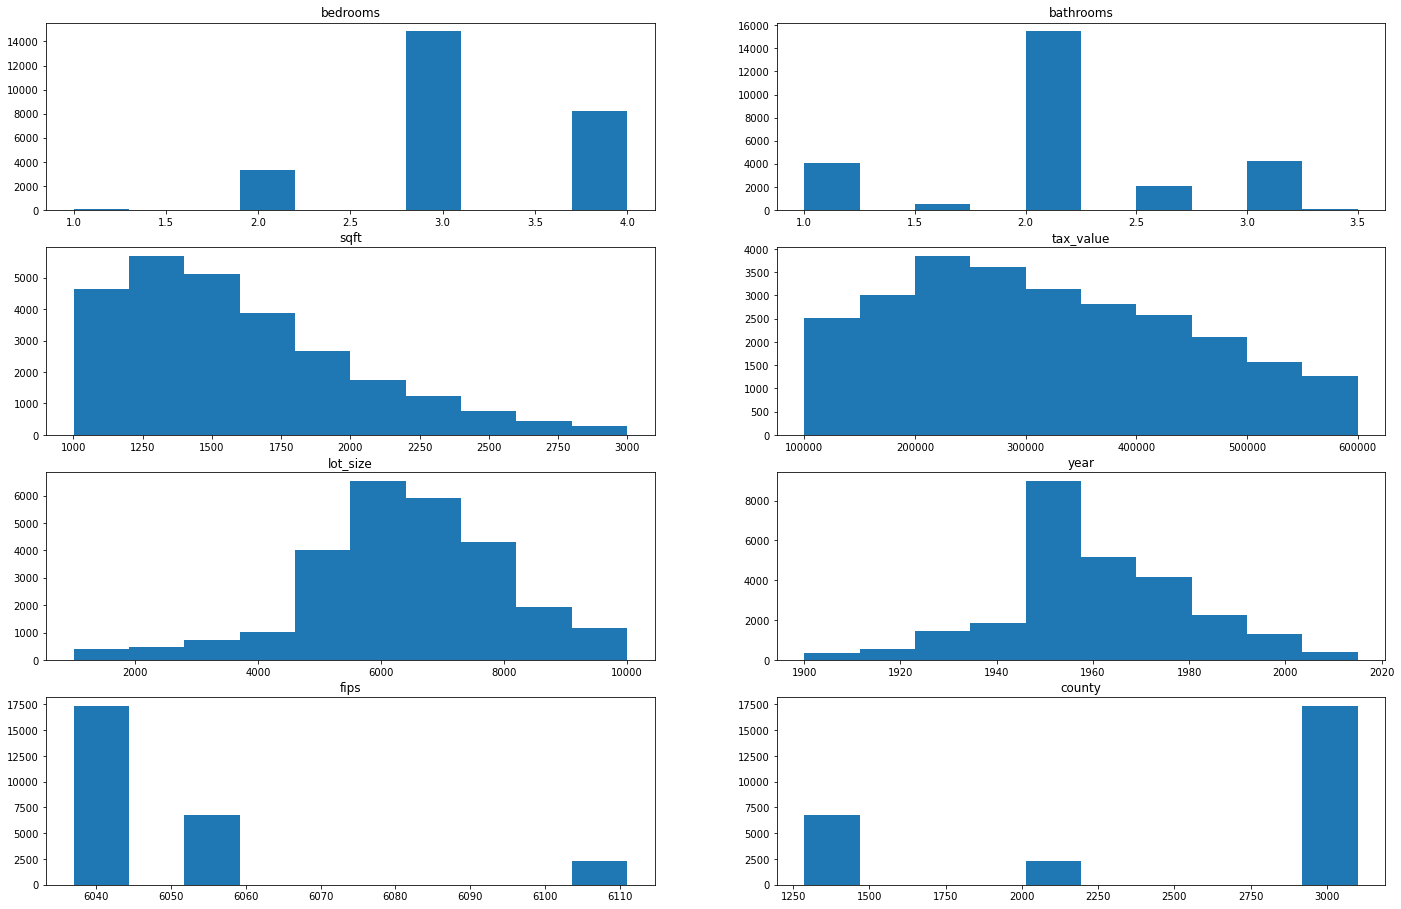

In [10]:
plot_variable_hist(df)

In [11]:
train, validate, test = wrangle.split_data(df)

In [12]:
def plot_variable_pairs(df):
    '''This function takes in a dataframe and returns a pairplot of variables with a red regression line.'''
    return sns.pairplot(df, kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})

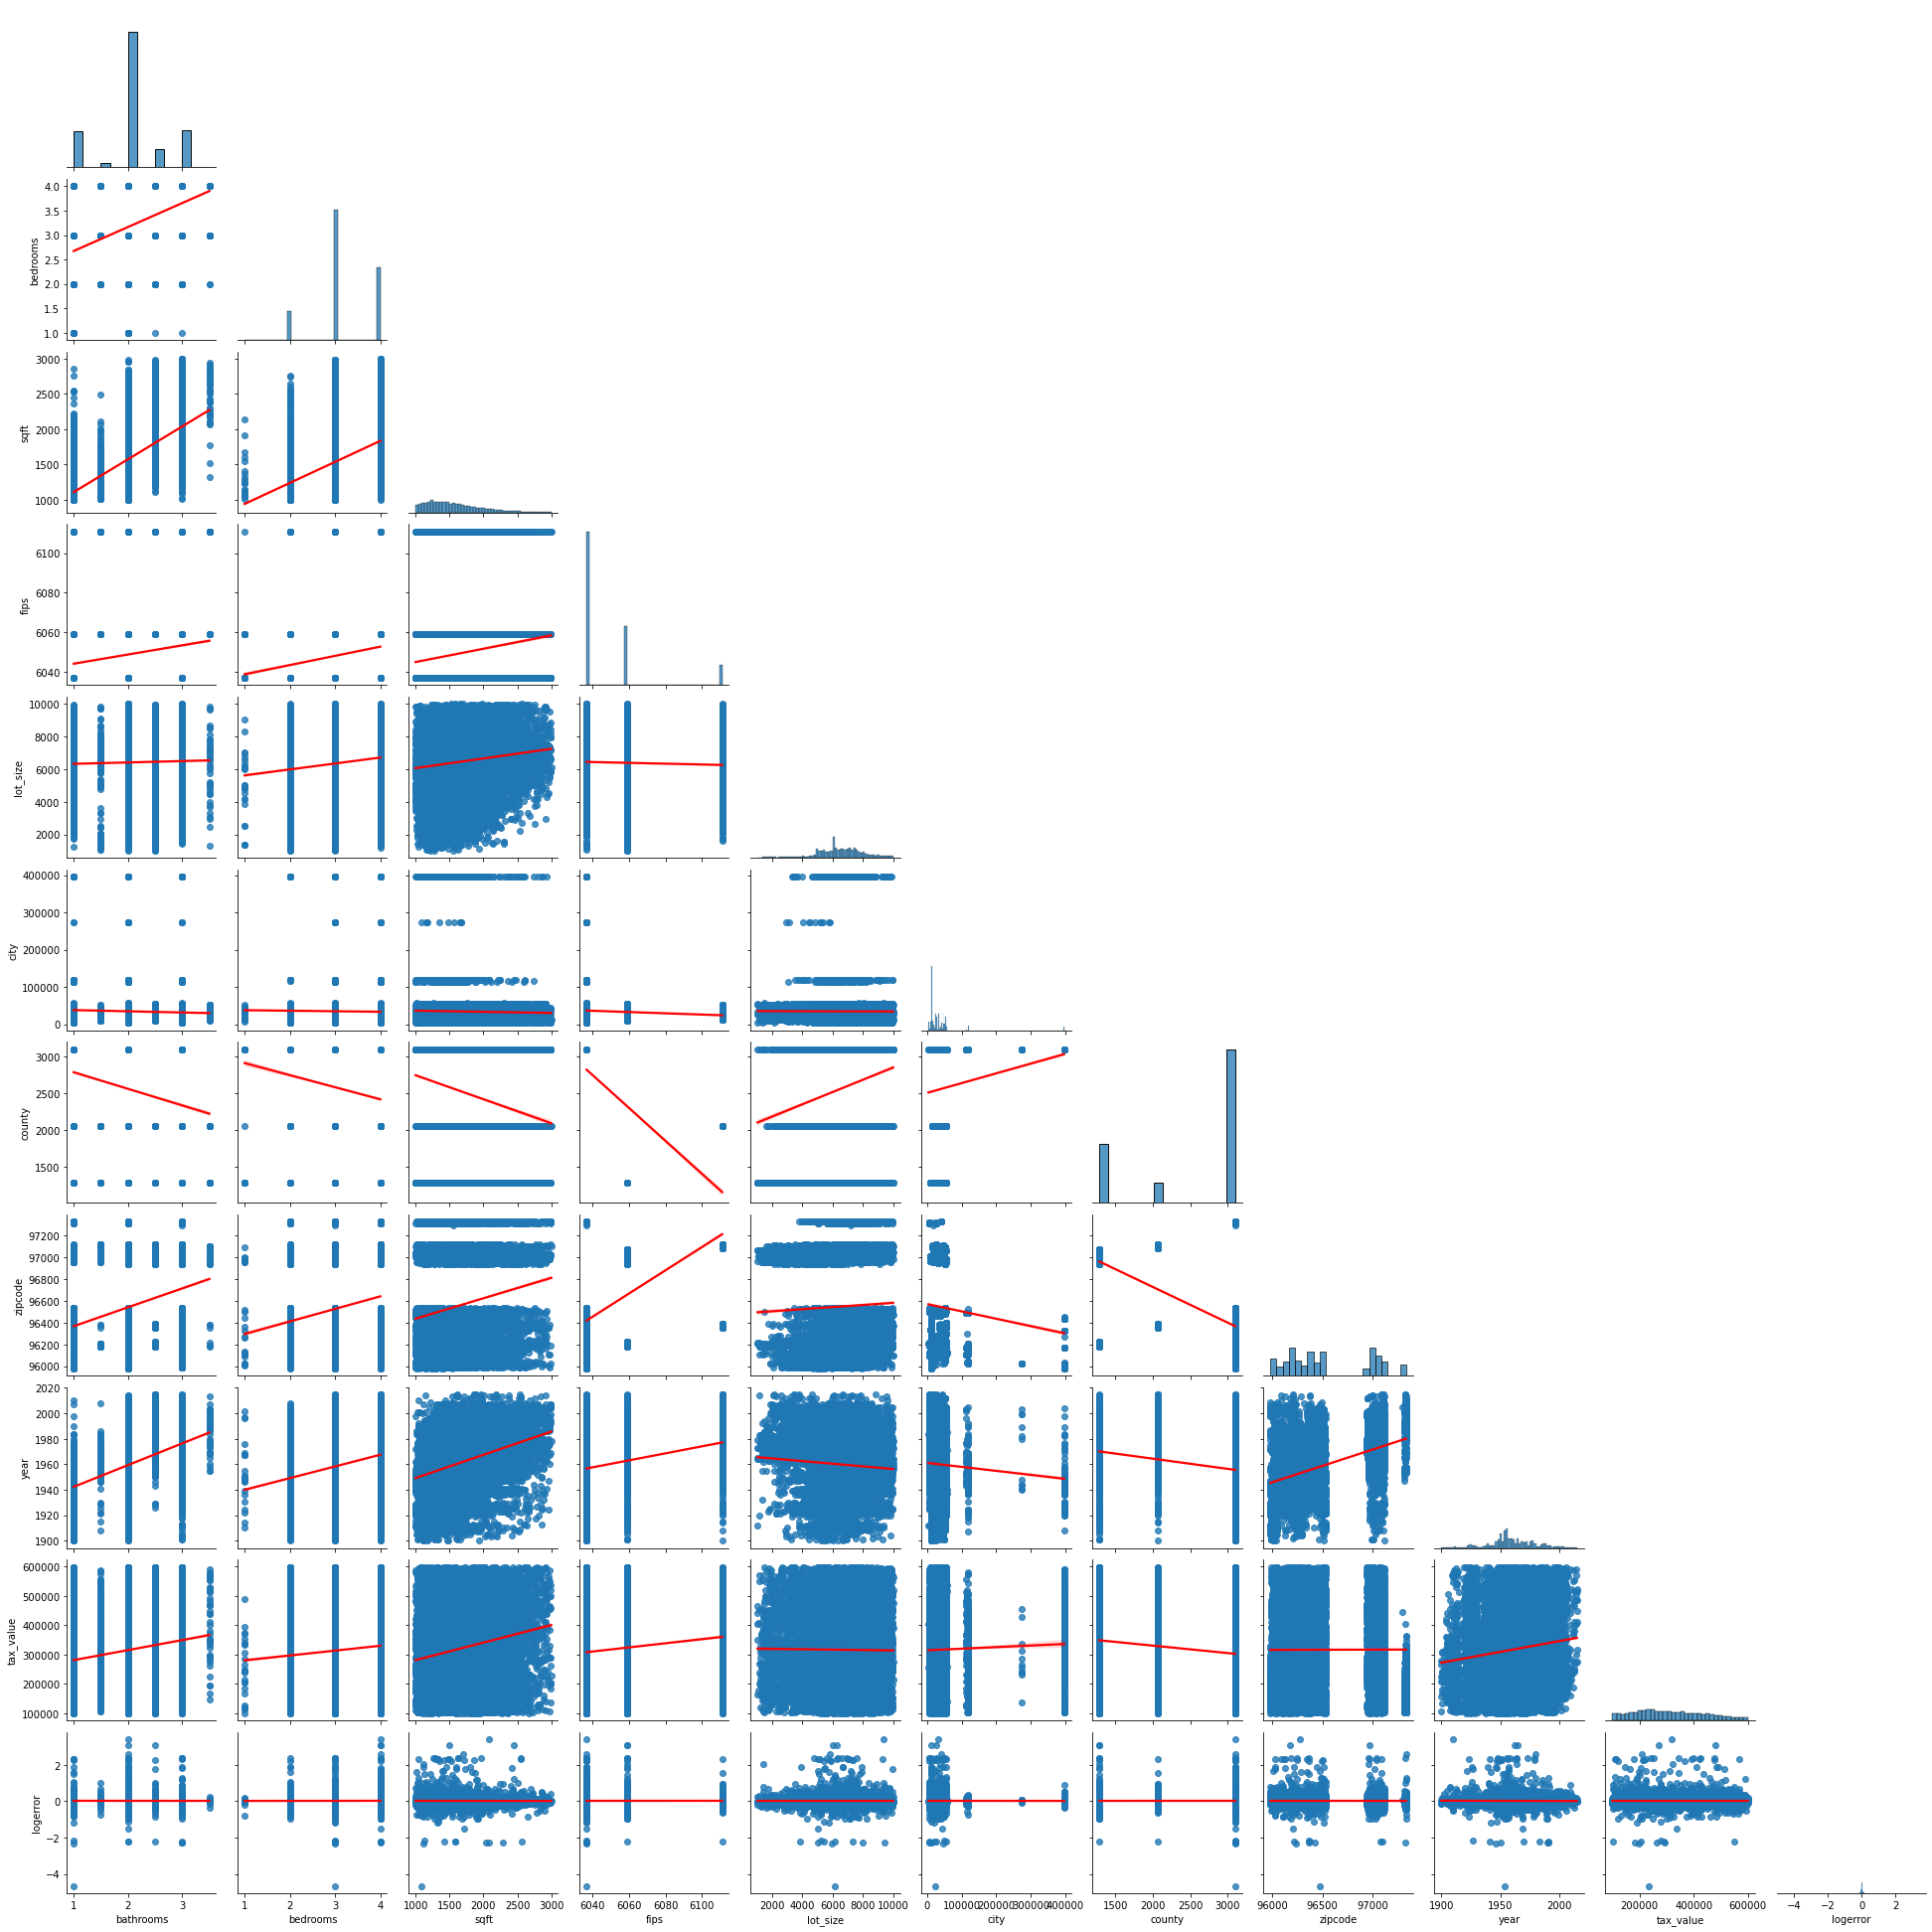

In [13]:
plot_variable_pairs(train)

In [17]:
def plot_vars(df):
    '''This function takes in a dataframe and returns visualizations for each discrete/continuous variable combination.'''
    # adjust figure size to make the charts easier to see
    plt.figure(figsize=[20,16])   
    # first subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,1)
    # enhanced boxplot with scatterpoints of outliers removed
    sns.boxenplot(x='bedrooms', y='tax_value', data=df, showfliers=False)
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='bedrooms', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # second subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,2)
    # enhanced boxplot with scatterpoints of outliers removed
    sns.boxenplot(x='bathrooms', y='tax_value', data=df, showfliers=False)
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='bathrooms', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # third subplot of 9, displayed as 3 rows and 3 columns
    plt.subplot(3,3,3)
    # lineplot is used for 'year' because it was the best visualization for this variable
    sns.lineplot(x='year', y='tax_value', data=df)
    # red regression line overlayed on boxplot, extended to fit the entire x-axis
    sns.regplot(x='year', y='tax_value', data=df, truncate=False, scatter=False, color='red')
    # the rest of the code is the same as above but the y-variables are changed
    plt.subplot(3,3,4)
    sns.boxenplot(x='bedrooms', y='lot_size', data=df, showfliers=False)
    sns.regplot(x='bedrooms', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,5)
    sns.boxenplot(x='bathrooms', y='lot_size', data=df, showfliers=False)
    sns.regplot(x='bathrooms', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,6)
    sns.lineplot(x='year', y='lot_size', data=df)
    sns.regplot(x='year', y='lot_size', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,7)
    sns.boxenplot(x='bedrooms', y='sqft', data=df, showfliers=False)
    sns.regplot(x='bedrooms', y='sqft', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,8)
    sns.boxenplot(x='bathrooms', y='sqft', data=df, showfliers=False)
    sns.regplot(x='bathrooms', y='sqft', data=df, truncate=False, scatter=False, color='red')
    plt.subplot(3,3,9)
    sns.lineplot(x='year', y='sqft', data=df)
    sns.regplot(x='year', y='sqft', data=df, truncate=False, scatter=False, color='red')
    

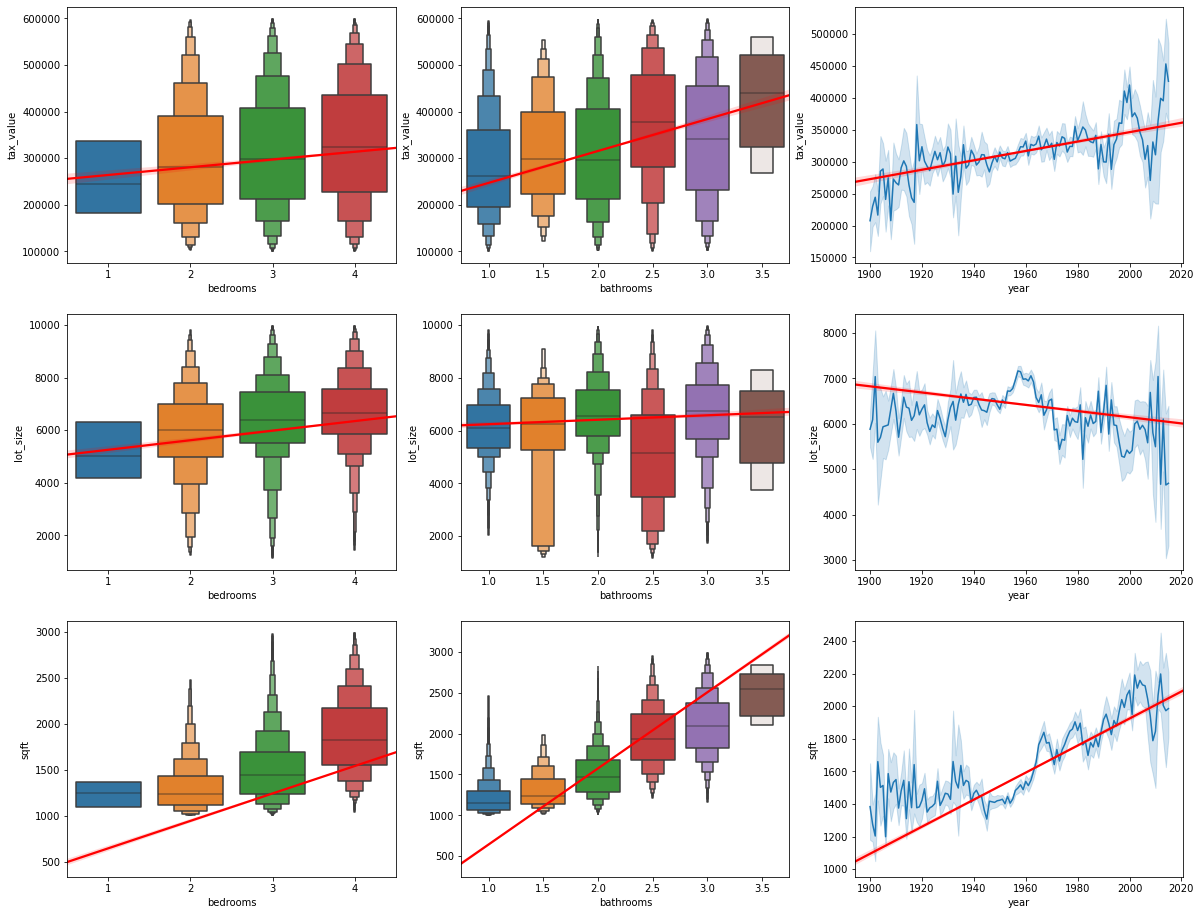

In [18]:
plot_vars(train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

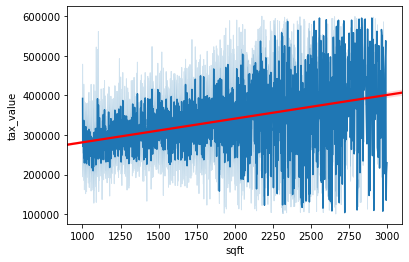

In [30]:
sns.lineplot(train.sqft, train.tax_value)
sns.regplot(x='sqft', y='tax_value', data=train, truncate=False, scatter=False, color='red')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lot_size', ylabel='tax_value'>

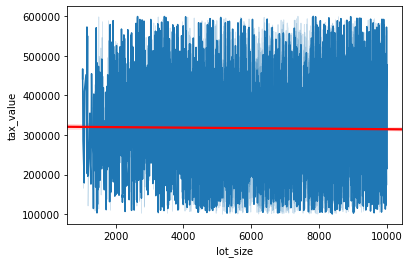

In [31]:
sns.lineplot(train.lot_size, train.tax_value)
sns.regplot(x='lot_size', y='tax_value', data=train, truncate=False, scatter=False, color='red')